## Student Performance Evaluation: A Beginer ML Project

### 1 Project Description

The goal of this project is to assess student performance based on a number of factors. This is a binary classification problem. The aim is to class students who receive a grade of 65 and above (Above Average) or below 65 (Below Average).

The project involves the following steps:
- exploring the data and splitting the data into datasets to be used in training;
- training the following machine learning models and tuning their parameters:
    * Logistic Regression, 
    * Decision Tree Classifier, 
    * Random Forest Classifier, 
    * XGBoost Classifier, and
    * Gradient Boosting Classifier;
- evaluating the models and selecting the most performant one;
- creating a web application with the final model using Flask and Gunicorn;
- deploying the model locally with Docker.

### 2 Exploratory Data Analysis (EDA) and Data Cleaning

#### 2.1 Data Preparation

In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns

In [2]:
# Loading the dataset.
data = '../data/StudentPerformanceFactors.csv'
df = pd.read_csv(data)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
# Get the basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
# Remove any missing data in the df.
df = df.dropna()
df.isna().sum()


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [5]:
# Finding duplicated rows.
df[df.duplicated()].sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: object

In [6]:
# Format all text - removing spaces and hyphens.
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_').replace('-', '_', regex=True)

In [7]:
# Format all numerical values.
numerical = list(df.dtypes[df.dtypes != 'object'].index)
for n in numerical:
    df[n] = pd.to_numeric(df[n], errors='coerce')

#### 2.2  Feature Distributions

In [8]:
# Grouped columns.
categorical, numerical

(['parental_involvement',
  'access_to_resources',
  'extracurricular_activities',
  'motivation_level',
  'internet_access',
  'family_income',
  'teacher_quality',
  'school_type',
  'peer_influence',
  'learning_disabilities',
  'parental_education_level',
  'distance_from_home',
  'gender'],
 ['hours_studied',
  'attendance',
  'sleep_hours',
  'previous_scores',
  'tutoring_sessions',
  'physical_activity',
  'exam_score'])

In [9]:
# Get the numerical summary statistics of the dataset.
df.describe().round(3)

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
count,6378.000,6378.000,6378.000,6378.000,6378.000,6378.000,6378.000
mean,19.977,80.021,7.035,75.066,1.495,2.973,67.252
std,5.985,11.551,1.468,14.400,1.234,1.029,3.914
min,1.000,60.000,4.000,50.000,0.000,0.000,55.000
25%,16.000,70.000,6.000,63.000,1.000,2.000,65.000
50%,20.000,80.000,7.000,75.000,1.000,3.000,67.000
75%,24.000,90.000,8.000,88.000,2.000,4.000,69.000
max,44.000,100.000,10.000,100.000,8.000,6.000,101.000


There are values greater than 100 in the exam_score column. Those will not be considered valid.

In [10]:
# Remove invalid rows.
df = df[df.exam_score <= 100]

In [11]:
# Get the categorical summary statistics of the dataset
df.describe(exclude = [np.number])

,parental_involvement,access_to_resources,extracurricular_activities,motivation_level,internet_access,family_income,teacher_quality,school_type,peer_influence,learning_disabilities,parental_education_level,distance_from_home,gender
count,6377,6377,6377,6377,6377,6377,6377,6377,6377,6377,6377,6377,6377
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,medium,medium,yes,medium,yes,low,medium,public,positive,no,high_school,near,male
freq,3251,3203,3806,3237,5893,2582,3826,4433,2552,5709,3158,3801,3688



#### 2.3 Target Varaible Distribution Analysis
 

In [12]:
# The Target Variable
target = 'exam_score'

# Preparing the target Variable:
# Separating Above Average students (exam score >= 65) from Below Average Students
# y_full is a df of the Target Variable
df[target] = np.where(df["exam_score"] <= 65, 0, 1)
y_full = df[target]

# Remove Target from datase and column list
numerical.remove(target)
df_full = df.drop(columns=target)

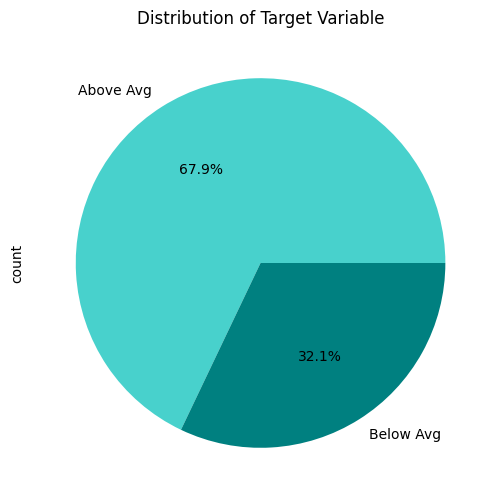

In [13]:
# Checking the distribution of Target Variable
import matplotlib.pyplot as plt

exam_score_values = {
    0: 'Below Avg',
    1: 'Above Avg'}
colors = ['mediumturquoise', 'teal']

plt.figure(figsize=(8, 6))
y_full.map(exam_score_values).value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Target Variable')
plt.show()

The dataset is imbalanced, with more Above Average Students. Therefore, when the dataset is later split, it has to be stratified.

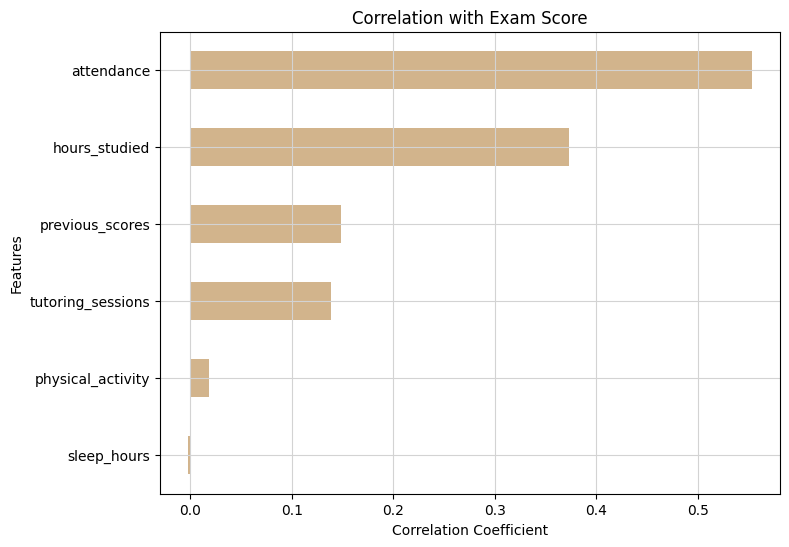

In [14]:
# Find features that may have a close linear correlation with your target variable
corr = df[numerical].corrwith(y_full, axis=0)
corr.sort_values(inplace=True)

# Plot the correlation of features with Loan_Status
plt.figure(figsize=(8, 6))
# sns.barplot(y=corr.index, x=corr.values, palette="coolwarm")
corr.plot(y=corr.index,
          x=corr.values,
          kind='barh',
          color='tan')
plt.grid(color='lightgrey')
plt.title("Correlation with Exam Score")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

This indicates that Attendance might be a significant predictor for the student's Exam Score.

In [15]:
# Remove highly correlated variable from dataset and column list.
high_corr = 'attendance'
numerical.remove(high_corr)
df_full = df.drop(columns=high_corr)

### 3 Setting up the train-validate-test framework

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataframe into 60%, 20%, 20% parts
# Create Training, Validation and Testing datasets.
df_train_val, df_test, y_train_val, y_test = train_test_split(df_full, y_full, test_size=0.2, random_state=1, stratify=y_full)
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size=0.25, random_state=1, stratify=y_train_val)

In [17]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_val_dict = df_train_val[categorical + numerical].to_dict(orient='records')
X_train_val = dv.fit_transform(train_val_dict)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

### 4 Training the Models

- Logistic Regression
- Decision Tree
- GradientBoosting
- Random Forest
- XGBoost

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [19]:
# Models with default values of parameters we will optimize
models = [
    LogisticRegression(max_iter=100, C=1.0),
    DecisionTreeClassifier(max_depth=None, min_samples_split=2),
    GradientBoostingClassifier(learning_rate=0.1, n_estimators=100),
    RandomForestClassifier(max_depth=None, n_estimators=100),
    XGBClassifier(learning_rate=0.1, max_depth=None, n_estimators=100)
]


In [20]:
def train(model):
    '''Train a model using the provided model.'''

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    
    # Convert continouos values generated by LR to binary
    if type(y_pred) != int:
        y_pred = (y_pred >= 0.5).astype(int)

    # Get evaluation metrics    
    roc_auc = roc_auc_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    f_one_score = f1_score(y_val, y_pred)
    
    return roc_auc, accuracy, f_one_score

In [21]:
results = []

for model in models:
    roc_auc, accuracy, f_one_score = train(model)
    results.append(
        {
            'model': str(model).split('(')[0],
            'roc_auc': roc_auc,
            'accuracy': accuracy,
            'f1_score': f_one_score
        }
    )

model_scores = pd.DataFrame(results)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
model_scores

,model,roc_auc,accuracy,f1_score
0,LogisticRegression,0.701105,0.757053,0.827394
1,DecisionTreeClassifier,0.587753,0.636364,0.729919
2,GradientBoostingClassifier,0.680830,0.745298,0.821134
3,RandomForestClassifier,0.634700,0.726489,0.815637
4,XGBClassifier,0.686919,0.742163,0.815893


Before tuning the parameters, Logistic Regression gives the best results.

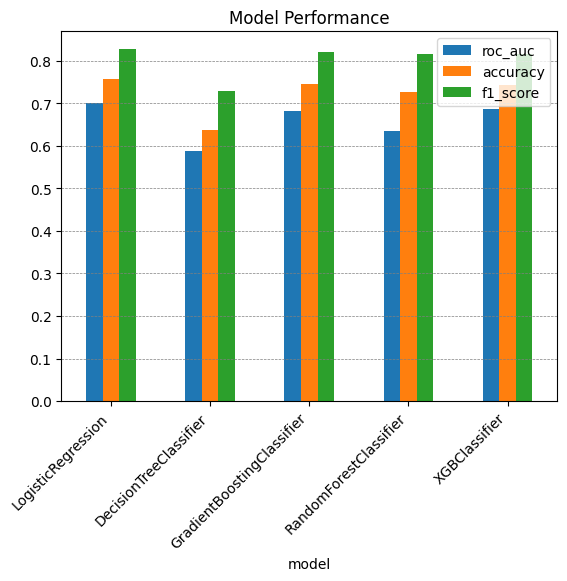

In [23]:
model_scores.plot(
    x='model', 
    kind='bar',
    stacked=False, 
    title='Model Performance')
plt.grid(
    axis='y',
    color='grey',
    linestyle='--',
    linewidth = 0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

### 5 Model Selection and Parameter Tuning

In [24]:
# Models with values of parameters we will optimize for.

models = [
[
    LogisticRegression(),
#    'params': 
    {
        'max_iter': range(100,1001,100),
        'penalty': ['l2', None],
        'C': [0.01, 0.1, 1, 10, 100]
    }
],
[
    DecisionTreeClassifier(),
#    'params': 
    {
        'max_depth': range(5,26,5),
        'min_samples_split': range(5,21,5)
    }
],
[
    RandomForestClassifier(),
#    'params': 
    {
        'n_estimators': range(100,201,25),
        'max_depth': range(5,26,5),
        'min_samples_leaf': range(2,21,2)
    }

],
[
    GradientBoostingClassifier(),
#    'params': 
    {
        'n_estimators': range(100,201,25),
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
    }
],
[
    XGBClassifier(use_label_encoder=False, eval_metric='auc', objective='binary:logistic', verbosity=0),
#    'params': 
    {
        'n_estimators': range(100,201,25),
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
        'max_depth': range(5,26,5)
    }
]]

In [25]:
from sklearn.model_selection import GridSearchCV
# import scipy.stats as stats

results = []

for model in models:
    grid_search = GridSearchCV(
        estimator=model[0], 
        param_grid=model[1], 
        cv=3, 
        scoring='roc_auc', 
        n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters from the grid search
    model_best_params = grid_search.best_params_
    model_score = grid_search.best_score_
    y_pred = grid_search.best_estimator_.predict(X_val)
    roc_val_score = roc_auc_score(y_val, y_pred)

    results.append(({
        'model': str(model[0]).split('(')[0],
        'model_score': model_score,
        'roc_auc': roc_val_score,
        'params': dict(model_best_params)
        }))

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [26]:
import pprint
pprint.pp(results)

[{'model': 'LogisticRegression',
  'model_score': np.float64(0.828444013894325),
  'roc_auc': np.float64(0.6998826857076786),
  'params': {'C': 100, 'max_iter': 100, 'penalty': 'l2'}},
 {'model': 'DecisionTreeClassifier',
  'model_score': np.float64(0.7406647627227131),
  'roc_auc': np.float64(0.6048764392856236),
  'params': {'max_depth': 5, 'min_samples_split': 15}},
 {'model': 'RandomForestClassifier',
  'model_score': np.float64(0.8095329077095755),
  'roc_auc': np.float64(0.6233069094170101),
  'params': {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 100}},
 {'model': 'GradientBoostingClassifier',
  'model_score': np.float64(0.8117640335233229),
  'roc_auc': np.float64(0.6781781316006915),
  'params': {'learning_rate': 0.05, 'n_estimators': 175}},
 {'model': 'XGBClassifier',
  'model_score': np.float64(0.8028625540281339),
  'roc_auc': np.float64(0.6708191978071252),
  'params': {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 125}}]


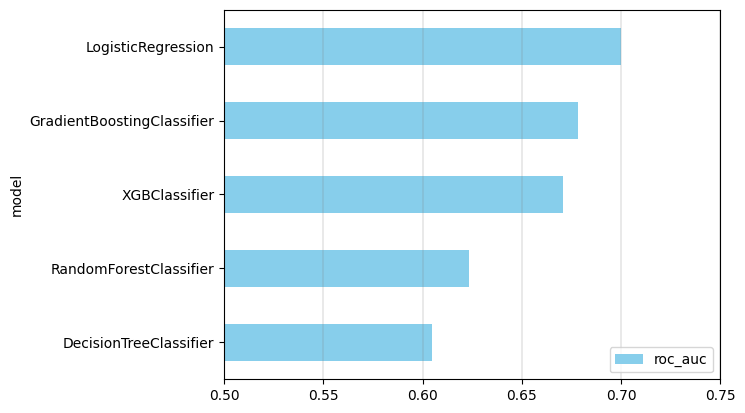

In [27]:
best_model_scores = pd.DataFrame(results, columns=['model','roc_auc'])
best_model_scores.sort_values('roc_auc',inplace=True)

best_model_scores.plot(
    x='model', 
    y='roc_auc', 
    kind='barh',
    color='skyblue')

plt.grid(
    axis='x',
    color='grey',
    linewidth = 0.25)

plt.xlim(0.5, 0.75)
plt.show()


- Best model: LogisticRegression

# Best Model
### Fitting the best model on train_val (training + validation data) dataset

In [ ]:
lr = LogisticRegression(max_iter=100, C=100, penalty='l2')
lr.fit(X_train_val, y_train_val)

y_pred = lr.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
roc_auc

np.float64(0.8236704145198996)

### MISC: Testing Flask App

In [30]:
import pprint
df_ = df_test.sample(n=1)
df_ = df_.to_json(orient='records', lines=True)
pprint.pp(df_)

'{"hours_studied":20,"parental_involvement":"low","access_to_resources":"medium","extracurricular_activities":"yes","sleep_hours":7,"previous_scores":75,"motivation_level":"low","internet_access":"yes","tutoring_sessions":2,"family_income":"medium","teacher_quality":"high","school_type":"public","peer_influence":"neutral","physical_activity":2,"learning_disabilities":"no","parental_education_level":"high_school","distance_from_home":"near","gender":"female","exam_score":0}\n'


In [31]:
import requests
import json

url = "http://127.0.0.1:9696/predict"
data = "../data/random_rows/row1748.json"

In [32]:
# Open the JSON file with sample data
with open(data) as f:
    sample_data = json.load(f)

print(sample_data)

{'hours_studied': 21, 'parental_involvement': 'medium', 'access_to_resources': 'low', 'extracurricular_activities': 'no', 'sleep_hours': 5, 'previous_scores': 75, 'motivation_level': 'low', 'internet_access': 'yes', 'tutoring_sessions': 1, 'family_income': 'medium', 'teacher_quality': 'medium', 'school_type': 'public', 'peer_influence': 'negative', 'physical_activity': 4, 'learning_disabilities': 'no', 'parental_education_level': 'college', 'distance_from_home': 'near', 'gender': 'male', 'exam_score': 1}


In [33]:
response = requests.post(url, json=sample_data)
response

<Response [200]>